## Pruning
Pruning is a technique used in machine learning and data science to reduce the size of decision trees by removing sections of the tree that provide little power in predicting target variables. This helps in reducing the complexity of the model, preventing overfitting, and improving the model's generalization to new data.

## Branch / Sub Tree
A subtree is a portion of a decision tree that forms a smaller tree within the larger structure. It consists of a node and all its descendants, which can be treated as a separate decision tree. Subtrees can be pruned or expanded based on their contribution to the overall model's performance.


### Why Overfit?

Overfitting occurs when a machine learning model captures the noise in the training data rather than the underlying pattern. This typically happens when the model is too complex, such as having too many parameters relative to the number of observations. In the context of decision trees, overfitting can occur when the tree is allowed to grow too deep, capturing all the nuances of the training data, including the noise.

#### Causes of Overfitting:
1. **Complex Models**: Models with high complexity (e.g., deep decision trees) can fit the training data very closely, including the noise.
2. **Insufficient Training Data**: When the amount of training data is small, the model may not generalize well to new data.
3. **Noise in Data**: If the training data contains a lot of noise, the model may learn these random fluctuations as if they were true patterns.

#### Consequences of Overfitting:
1. **Poor Generalization**: The model performs well on training data but poorly on unseen test data.
2. **High Variance**: The model's predictions vary significantly with small changes in the training data.

#### How to Prevent Overfitting:
1. **Pruning**: Reduce the size of the decision tree by removing sections that provide little power in predicting target variables.
2. **Cross-Validation**: Use techniques like k-fold cross-validation to ensure the model generalizes well to unseen data.
3. **Simpler Models**: Use simpler models with fewer parameters.
4. **Regularization**: Apply regularization techniques to penalize complex models.
5. **More Training Data**: Increase the size of the training dataset to provide the model with more examples to learn from.


In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [169]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [170]:
dataset.drop(['User ID','Gender'], axis=1, inplace=True)

In [171]:
x = dataset.iloc[:, :-1]
y = dataset['Purchased']

In [172]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [173]:
x = pd.DataFrame(x, columns=['Age', 'EstimatedSalary'])
x.head(3)

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290


In [174]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Pre Pruning

### Overfitted

In [175]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [176]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dt.score(x_train, y_train)*100))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dt.score(x_test, y_test)*100))

Accuracy of Decision Tree classifier on training set: 99.69
Accuracy of Decision Tree classifier on test set: 83.75


### Resolve Overfit

In [177]:
dt_remove_overfit = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
# max_depth=5 max_depth is the maximum depth of the tree
dt_remove_overfit.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [178]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dt_remove_overfit.score(x_train, y_train)*100))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dt_remove_overfit.score(x_test, y_test)*100))

Accuracy of Decision Tree classifier on training set: 91.88
Accuracy of Decision Tree classifier on test set: 91.25


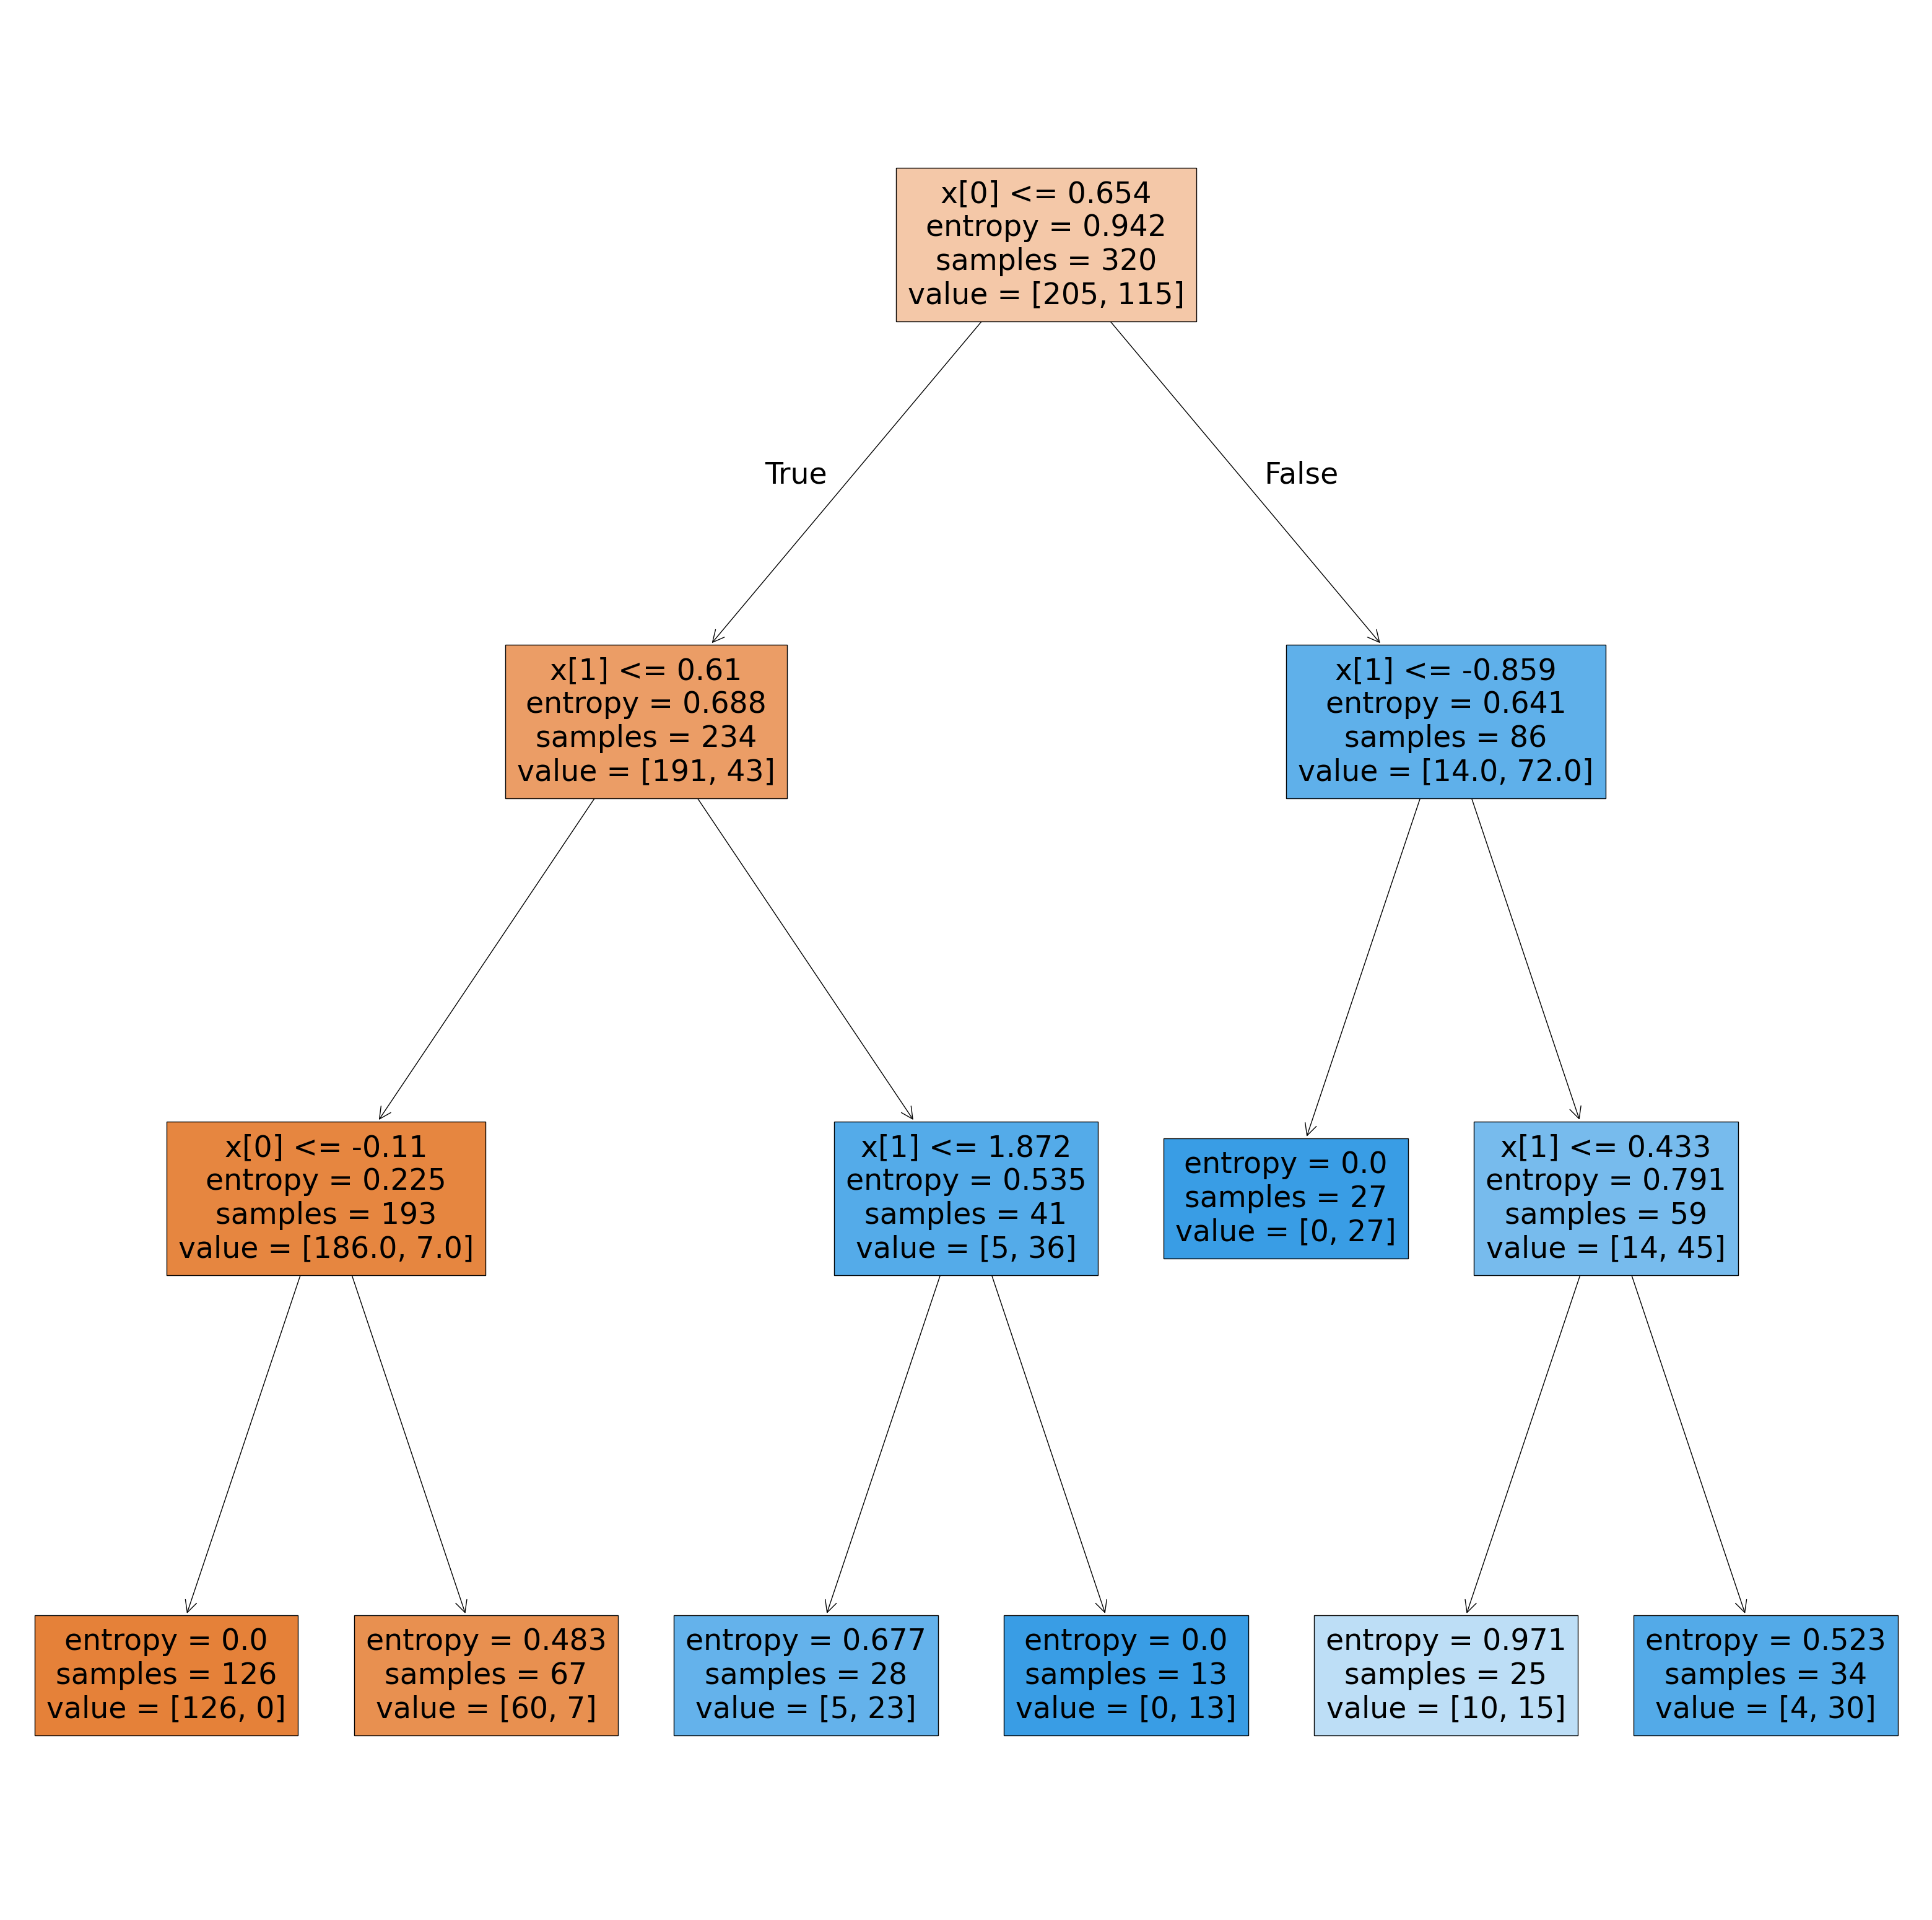

In [179]:
plt.figure(figsize=(40,40))
plot_tree(dt_remove_overfit, filled=True)
plt.savefig('DecisionTreeRemoveOverfit.png')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'Age')

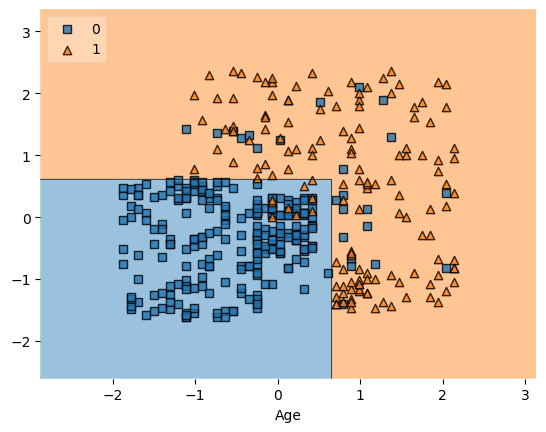

In [180]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt_remove_overfit, legend=2)
plt.xlabel(x.columns[0])

#### check overfitting in various maxdepth

In [181]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=i)
    dt2.fit(x_train, y_train)
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dt2.score(x_train, y_train)*100))
    print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dt2.score(x_test, y_test)*100)
    )
    print('Max depth: ', i)
    print('-----------------------------------')

Accuracy of Decision Tree classifier on training set: 82.19
Accuracy of Decision Tree classifier on test set: 90.00
Max depth:  1
-----------------------------------
Accuracy of Decision Tree classifier on training set: 91.88
Accuracy of Decision Tree classifier on test set: 91.25
Max depth:  2
-----------------------------------
Accuracy of Decision Tree classifier on training set: 91.88
Accuracy of Decision Tree classifier on test set: 91.25
Max depth:  3
-----------------------------------
Accuracy of Decision Tree classifier on training set: 91.88
Accuracy of Decision Tree classifier on test set: 91.25
Max depth:  4
-----------------------------------
Accuracy of Decision Tree classifier on training set: 93.12
Accuracy of Decision Tree classifier on test set: 91.25
Max depth:  5
-----------------------------------
Accuracy of Decision Tree classifier on training set: 95.00
Accuracy of Decision Tree classifier on test set: 87.50
Max depth:  6
-----------------------------------
Accu